# 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importando bases de dados

In [6]:
listings_csv_small = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/visualisations/listings.csv", sep=',',encoding='utf-8')

In [7]:
listings_csv_full = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/data/listings.csv.gz", sep=',',encoding='utf-8')

In [8]:
listings_csv_small.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

['number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [29]:
listings_csv_full.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# 3. Iniciando Analises

## Perguntas a Serem respondidas:

- Qual é o top 3 locais com melhor avaliação?
- Quais hosts tem mais imóveis? (top 5)
- Média de quartos por cidade x média de preço de locação
- Quantidade de noites x avaliação ?
- Qual host recebeu mais visitas?

In [32]:
filtro = ['id','listing_url',   'name','neighbourhood', 'neighborhood_overview','host_id', ] + [i for i in listings_csv_full.columns if 'review' in i]

### Qual é o top 3 locais com melhor avaliação?

In [16]:
np.mean([4.77, 4.65	, 4.83, 4.91, 4.77,4.67])

4.766666666666667

In [33]:
listings_analise = listings_csv_full[filtro]

In [35]:
listings_analise.sort_values(by=['review_scores_rating'], ascending=False)

,id,listing_url,name,neighbourhood,neighborhood_overview,host_id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
35999,1053716797020259779,https://www.airbnb.com/rooms/1053716797020259779,Rental unit in Rio de Janeiro · ★New · 1 bedro...,"Rio de Janeiro, Brazil",A Barra da Tijuca é conhecida por sua beleza n...,154114238,2,2,2,2023-12-25,2023-12-27,5.0,5.0,5.0,5.00,5.00,5.00,5.00,2.00
27922,908754456053056494,https://www.airbnb.com/rooms/908754456053056494,Rental unit in Rio de Janeiro · ★5.0 · 1 bedro...,"Rio de Janeiro, Brazil",O Flamengo é um tradicional bairro do Rio de J...,172249841,13,13,2,2023-08-11,2023-12-24,5.0,5.0,5.0,4.93,4.79,4.86,4.86,2.75
14824,49288167,https://www.airbnb.com/rooms/49288167,Rental unit in Copacabana · Studio · 1 bed · 1...,NaN,NaN,292590334,2,0,0,2021-10-31,2022-01-06,5.0,5.0,5.0,5.00,4.50,5.00,4.00,0.08
14828,49713149,https://www.airbnb.com/rooms/49713149,Place to stay in Barra da Tijuca · ★5.0 · 1 be...,NaN,NaN,53861325,3,0,0,2021-08-26,2022-12-13,5.0,5.0,5.0,5.00,5.00,5.00,5.00,0.11
27943,907993270268039843,https://www.airbnb.com/rooms/907993270268039843,Rental unit in Copacabana · ★5.0 · 1 bedroom ·...,"Copacabana, Rio de Janeiro, Brazil",Copacabana é o bairro mais famoso do Rio de Ja...,505594335,3,3,0,2023-09-11,2023-11-20,5.0,5.0,5.0,5.00,4.67,5.00,4.67,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36003,1053746406056980189,https://www.airbnb.com/rooms/1053746406056980189,Home in Rio de Janeiro · ★New · 1 bedroom · 4 ...,NaN,NaN,470173166,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36004,1053756202332288557,https://www.airbnb.com/rooms/1053756202332288557,Rental unit in Rio de Janeiro · ★New · 1 bedro...,"Rio de Janeiro, Brazil",Copacabana is located in Rio de Janeiro's stun...,6000862,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36005,1053789340172837654,https://www.airbnb.com/rooms/1053789340172837654,Rental unit in Rio de Janeiro · ★New · 1 bedro...,NaN,NaN,206898000,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36006,1053808194231554793,https://www.airbnb.com/rooms/1053808194231554793,Rental unit in Rio de Janeiro · ★New · 1 bedro...,NaN,NaN,536983374,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
listings_analise.sort_values(by=['number_of_reviews'], ascending=False)

,id,listing_url,name,neighbourhood,neighborhood_overview,host_id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
3926,10730455,https://www.airbnb.com/rooms/10730455,Rental unit in Rio de Janeiro · ★4.86 · 2 bedr...,"Rio de Janeiro, Brazil","Uma das praias mais famosas do mundo, Copacaba...",24875639,638,74,5,2016-02-04,2023-12-14,4.86,4.88,4.84,4.97,4.96,4.94,4.89,6.64
213,494903,https://www.airbnb.com/rooms/494903,Home in Rio de Janeiro · ★4.88 · 1 bedroom · 1...,"Rio de Janeiro, Brazil",The location of Casablanca is certainly privil...,2444956,627,65,5,2012-10-08,2023-12-26,4.88,4.88,4.93,4.93,4.92,4.70,4.87,4.59
100,273463,https://www.airbnb.com/rooms/273463,Rental unit in Rio · ★4.82 · 2 bedrooms · 6 be...,"Rio, Rio de Janeiro, Brazil","Lagoa é um bairro muito chique, seguro, centra...",319672,587,39,1,2012-02-01,2023-11-30,4.82,4.88,4.85,4.92,4.94,4.84,4.70,4.05
43,70080,https://www.airbnb.com/rooms/70080,Rental unit in Rio · ★4.80 · 1 bedroom · 5 bed...,"Rio, Rio de Janeiro, Brazil",Ipanema is the best neighborhood in Rio!,319672,555,65,6,2012-01-07,2023-12-23,4.80,4.87,4.82,4.91,4.94,4.90,4.70,3.80
602,996602,https://www.airbnb.com/rooms/996602,Rental unit in Rio de Janeiro · ★4.81 · 1 bedr...,NaN,NaN,5475732,552,51,3,2013-04-03,2023-12-17,4.81,4.86,4.82,4.93,4.93,4.88,4.80,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28334,919724423214091627,https://www.airbnb.com/rooms/919724423214091627,Rental unit in Rio de Janeiro · ★New · 2 bedro...,NaN,NaN,487607908,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3598,10094083,https://www.airbnb.com/rooms/10094083,Home in Rio de Janeiro · 5 bedrooms · 8 beds ·...,NaN,NaN,14315601,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,10231367,https://www.airbnb.com/rooms/10231367,Rental unit in Ipanema · 4 bedrooms · 5 beds ·...,NaN,NaN,22713969,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28337,923962587207221962,https://www.airbnb.com/rooms/923962587207221962,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,"Rio de Janeiro, Brazil",Botafogo é um dos bairros mais descolados e cu...,125121750,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quais hosts tem mais imóveis? (top 5)

In [38]:
listings_csv_full.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [41]:
host_listings = listings_csv_full[['host_id', 'host_url', 'host_name','host_listings_count']]

In [46]:
host_listings.sort_values(by='host_listings_count', ascending=False).head()

,host_id,host_url,host_name,host_listings_count
22931,341887136,https://www.airbnb.com/users/show/341887136,Tabas,1405.0
22771,341887136,https://www.airbnb.com/users/show/341887136,Tabas,1405.0
22344,341887136,https://www.airbnb.com/users/show/341887136,Tabas,1405.0
16535,341887136,https://www.airbnb.com/users/show/341887136,Tabas,1405.0
22925,341887136,https://www.airbnb.com/users/show/341887136,Tabas,1405.0


In [48]:
host_listings.sort_values(by='host_listings_count', ascending=False).drop_duplicates('host_id').head()

,host_id,host_url,host_name,host_listings_count
22931,341887136,https://www.airbnb.com/users/show/341887136,Tabas,1405.0
32056,319227148,https://www.airbnb.com/users/show/319227148,Anfitrião Prime,683.0
13988,23987702,https://www.airbnb.com/users/show/23987702,CarpediemHomes,374.0
30166,240364027,https://www.airbnb.com/users/show/240364027,Debora,343.0
3843,107248804,https://www.airbnb.com/users/show/107248804,Solon,266.0


In [49]:
host_listings['host_id'].nunique()

21980

In [62]:
host_listings.groupby(['host_name', 'host_url','host_listings_count']).count().sort_values(ascending=False, by='host_id')

host_id
host_name      host_url                                    host_listings_count         
Omar Do Rio    https://www.airbnb.com/users/show/6000862   191.0                    185
Daniel         https://www.airbnb.com/users/show/91654021  208.0                    157
Tabas          https://www.airbnb.com/users/show/341887136 1405.0                   145
Renato         https://www.airbnb.com/users/show/47584281  148.0                    142
Estadia        https://www.airbnb.com/users/show/1982737   144.0                    142
...                                                                                 ...
Gilles Pacheco https://www.airbnb.com/users/show/443542111 1.0                        1
Gilles         https://www.airbnb.com/users/show/140237308 1.0                        1
               https://www.airbnb.com/users/show/10505514  2.0                        1
Gill           https://www.airbnb.com/users/show/482539448 1.0                        1
Karine         https://www.airbnb.com/users/show/91056611  1.0                        1

[21972 rows x 1 columns]

### Média de quartos por bairro x média de preço de locação

In [63]:
listings_csv_full.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [93]:
listings_csv_full[['host_has_profile_pic','review_scores_rating']].info()

array(['t', nan, 'f'], dtype=object)

In [95]:
?pd.get_dummies

Signature:
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'Dtype | None' = None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be e

In [97]:
translator_dict = {'t':1,'f':0}

In [98]:
listings_csv_full['profile_pic_bool'] = listings_csv_full['host_has_profile_pic'].map(lambda x:translator_dict.get(x) )

In [101]:
listings_csv_full[['profile_pic_bool','review_scores_rating']].corr()

,profile_pic_bool,review_scores_rating
profile_pic_bool,1.000000,0.025917
review_scores_rating,0.025917,1.000000


In [102]:
listings_csv_full.corr()

C:\Users\gnlin\AppData\Local\Temp\ipykernel_24464\3124177044.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  listings_csv_full.corr()


,id,scrape_id,description,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,profile_pic_bool
id,1.000000,NaN,NaN,0.417667,0.031599,0.022311,NaN,-0.011788,-0.012352,-0.031589,...,0.009073,-0.009190,0.054066,NaN,0.036442,0.035337,0.007578,0.029817,0.285343,-0.146311
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.417667,NaN,NaN,1.000000,0.020365,0.002322,NaN,0.009059,-0.116790,-0.046153,...,-0.022527,-0.033244,0.008755,NaN,-0.104914,-0.110661,0.039565,0.046524,0.152624,-0.250104
host_listings_count,0.031599,NaN,NaN,0.020365,1.000000,0.967159,NaN,-0.041375,0.039986,0.052146,...,-0.141794,-0.010721,-0.087377,NaN,0.588453,0.591947,0.037806,-0.004659,-0.026674,0.027081
host_total_listings_count,0.022311,NaN,NaN,0.002322,0.967159,1.000000,NaN,-0.049622,0.053686,0.068045,...,-0.152413,-0.009034,-0.096630,NaN,0.684793,0.684449,0.105149,-0.009886,-0.032111,0.031077
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,-0.011788,NaN,NaN,0.009059,-0.041375,-0.049622,NaN,1.000000,0.366216,-0.128714,...,0.012093,-0.102511,0.031667,NaN,-0.080205,-0.089373,0.074164,0.071019,-0.005912,-0.009311
longitude,-0.012352,NaN,NaN,-0.116790,0.039986,0.053686,NaN,0.366216,1.000000,-0.116783,...,0.010988,0.108143,0.013067,NaN,0.055324,0.054903,0.004695,0.016671,0.063611,0.042190
accommodates,-0.031589,NaN,NaN,-0.046153,0.052146,0.068045,NaN,-0.128714,-0.116783,1.000000,...,-0.014748,-0.006910,-0.030448,NaN,0.108811,0.121036,-0.152255,0.007664,-0.031273,0.001376


In [68]:
[i for i in listings_csv_full.columns if 'bed' in i]

['bedrooms', 'beds']

In [71]:
listings_beds = listings_csv_full[['bedrooms','beds']+[i for i in listings_csv_full.columns if 'neigh' in i]]

In [72]:
listings_beds.head()

,bedrooms,beds,neighborhood_overview,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,NaN,2.0,This is the one of the bests spots in Rio. Bec...,Copacabana,"Rio de Janeiro, Brazil",Copacabana,NaN
1,NaN,1.0,Copacabana is a lively neighborhood and the ap...,Copacabana,"Rio de Janeiro, Brazil",Copacabana,NaN
2,NaN,1.0,Our guests will experience living with a local...,Copacabana,"Rio de Janeiro, Brazil",Copacabana,NaN
3,NaN,NaN,NaN,Copacabana,NaN,Copacabana,NaN
4,NaN,1.0,NaN,Copacabana,NaN,Copacabana,NaN


In [74]:
listings_beds.groupby('neighbourhood_cleansed')['beds'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Engenho Novo          11.533333
Santa Cruz             6.529412
Acari                  6.000000
Guaratiba              5.264000
Joá                    4.930233
                        ...    
Deodoro                1.000000
Complexo do Alemão     1.000000
Maré                   1.000000
Cavalcanti             1.000000
Jacarezinho                 NaN
Name: beds, Length: 156, dtype: float64

In [77]:
test = '$1,357.00'

In [82]:
def refactor_price(price:str):
    price_f = float(str(price).replace('$','').replace(',',''))
    return price_f

In [83]:
refactor_price(test)

1357.0

In [85]:
listings_csv_full['price'] = listings_csv_full['price'].map(lambda x:refactor_price(x) )

In [87]:
listings_csv_full[listings_csv_full['price']<=10000].groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Joá                    3600.313131
Jacarezinho            1949.000000
Anchieta               1846.666667
Itanhangá              1668.183544
São Conrado            1662.788344
                          ...     
Tomás Coelho            142.400000
Vicente de Carvalho     137.500000
Jardim América          135.000000
Gericinó                110.000000
Mangueira                73.000000
Name: price, Length: 155, dtype: float64

In [67]:
listings_csv_full['bedrooms'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36008 entries, 0 to 36007
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 281.4 KB


In [42]:
host_listings.head()

,host_id,host_url,host_name,host_listings_count
0,68997,https://www.airbnb.com/users/show/68997,Matthias,2.0
1,102840,https://www.airbnb.com/users/show/102840,Viviane,1.0
2,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,1.0
3,178975,https://www.airbnb.com/users/show/178975,Nicky,4.0
4,1603206,https://www.airbnb.com/users/show/1603206,Bob,7.0


In [15]:
listings_csv_full[filtro].head()

,id,name,neighborhood_overview,host_id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17878,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,This is the one of the bests spots in Rio. Bec...,68997,311,29,4,2010-07-15,2023-12-22,4.70,4.77,4.65,4.83,4.91,4.77,4.67,1.90
1,25026,Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...,Copacabana is a lively neighborhood and the ap...,102840,275,29,2,2010-06-07,2023-12-03,4.72,4.70,4.79,4.81,4.92,4.84,4.60,1.67
2,35764,Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...,Our guests will experience living with a local...,153691,454,36,2,2010-10-03,2023-12-17,4.90,4.93,4.93,4.97,4.95,4.94,4.89,2.82
3,41198,Rental unit in Rio de Janeiro · ★4.21 · 2 bedr...,NaN,178975,17,0,0,2013-06-04,2016-02-09,4.21,3.88,4.25,4.69,4.56,4.44,4.38,0.13
4,326205,Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...,NaN,1603206,152,14,0,2012-04-18,2023-11-21,4.57,4.72,4.46,4.83,4.77,4.83,4.59,1.07


### Quantidade de noites x avaliação ?

In [ ]:
mediana_por_bairro = listings_csv.

In [26]:
listings_csv.groupby('neighbourhood').agg({'price':['mean', 'max','min', 'std'], 'neighbourhood':'count'}).sort_values(by=('price','mean'), ascending=False)

price                                 neighbourhood
                            mean       max     min           std         count
neighbourhood                                                                 
São Cristóvão        8674.779221  552637.0    50.0  63460.223323            81
Estácio              8478.032787  500000.0    55.0  63982.082255            62
Joá                  7879.917910   34819.0   200.0   8278.115345           135
São Conrado          2487.029326   45517.0    80.0   4675.802256           363
Jacarezinho          1949.000000    1949.0  1949.0           NaN             1
...                          ...       ...     ...           ...           ...
Vicente de Carvalho   137.500000     236.0    39.0    139.300036             2
Jardim América        135.000000     180.0    90.0     63.639610             2
Gericinó              110.000000     110.0   110.0           NaN             1
Mangueira              73.000000      73.0    73.0           NaN             1
Magalhães Bastos             NaN       NaN     NaN           NaN             1

[156 rows x 5 columns]

In [27]:
listings_csv[listings_csv['price']==552637.0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5571,13879989,Home in Rio de Janeiro · 1 bedroom · 4 beds · ...,82046629,Elizabeth,NaN,São Cristóvão,-22.89993,-43.23033,Shared room,552637.0,6,0,NaN,NaN,1,365,0,NaN


In [31]:
listings_csv['neighbourhood'].nunique()

156

In [38]:
bairros = ['Copacabana','Leblon', 'Ipanema', 'Barra da Tijuca', 'Recreio dos Bandeirantes', 'São Cristóvão']

In [41]:
listings_csv[listings_csv['neighbourhood'].isin(bairros)].boxplot(column='price', by='neighbourhood')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,Condo in Rio de Janeiro · ★4.70 · 2 bedrooms ·...,68997,Matthias,NaN,Copacabana,-22.965990,-43.179400,Entire home/apt,1357.0,5,311,2023-12-22,1.90,1,269,29,NaN
2,326205,Condo in Rio de Janeiro · ★4.57 · 1 bedroom · ...,1603206,Bob,NaN,Copacabana,-22.968250,-43.182370,Entire home/apt,366.0,3,152,2023-11-21,1.07,5,293,14,NaN
3,25026,Rental unit in Rio de Janeiro · ★4.72 · 1 bedr...,102840,Viviane,NaN,Copacabana,-22.977350,-43.191050,Entire home/apt,865.0,2,275,2023-12-03,1.67,1,228,29,NaN
4,326575,Rental unit in Rio de Janeiro · ★4.81 · 2 bedr...,1668565,Maria José,NaN,Copacabana,-22.976960,-43.189330,Entire home/apt,368.0,4,227,2023-11-21,1.58,1,245,12,NaN
7,35764,Loft in Rio de Janeiro · ★4.90 · 1 bedroom · 1...,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.981070,-43.191360,Entire home/apt,373.0,3,454,2023-12-17,2.82,1,62,36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,1053716797020259779,Rental unit in Rio de Janeiro · ★New · 1 bedro...,154114238,Breno,NaN,Barra da Tijuca,-23.010436,-43.357412,Entire home/apt,889.0,2,2,2023-12-27,2.00,4,55,2,NaN
36001,1053736263866696090,Rental unit in Rio de Janeiro · ★New · 1 bedro...,13411812,Fernando,NaN,Copacabana,-22.969913,-43.188015,Entire home/apt,760.0,2,0,NaN,NaN,16,87,0,NaN
36002,1053743193407023650,Rental unit in Rio de Janeiro · ★New · 1 bedro...,113031534,João,NaN,Barra da Tijuca,-23.003550,-43.340740,Entire home/apt,600.0,1,0,NaN,NaN,2,264,0,NaN
36004,1053756202332288557,Rental unit in Rio de Janeiro · ★New · 1 bedro...,6000862,Omar Do Rio,NaN,Copacabana,-22.980547,-43.195863,Entire home/apt,727.0,2,0,NaN,NaN,185,358,0,NaN


<Axes: title={'center': 'price'}, xlabel='neighbourhood'>

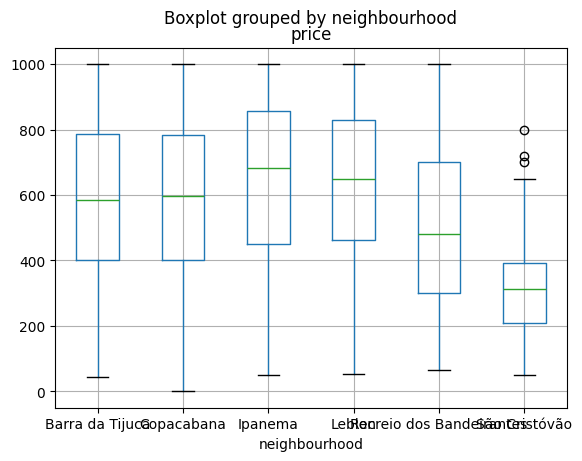

In [47]:
listings_csv[(listings_csv['neighbourhood'].isin(bairros))&(listings_csv['price'] <= 1000)].boxplot(column='price', by='neighbourhood')

In [32]:
listings_csv['neighbourhood'].unique()

array(['Copacabana', 'Flamengo', 'Laranjeiras', 'Santa Teresa', 'Tijuca',
       'Ipanema', 'Jardim Botânico', 'Jacarepaguá', 'Barra da Tijuca',
       'Leblon', 'Joá', 'Leme', 'Botafogo', 'Vila da Penha', 'Centro',
       'Lagoa', 'Gávea', 'Vidigal', 'Recreio dos Bandeirantes',
       'Santo Cristo', 'Itanhangá', 'São Conrado', 'Praça Seca',
       'Humaitá', 'Urca', 'Glória', 'Vargem Pequena', 'Saúde',
       'Alto da Boa Vista', 'Cosme Velho', 'Vargem Grande',
       'Penha Circular', 'Taquara', 'Jardim Sulacap', 'Rocinha',
       'Estácio', 'Rio Comprido', 'Praça da Bandeira', 'Cosmos', 'Gamboa',
       'Bonsucesso', 'Barra de Guaratiba', 'Piedade', 'Bangu',
       'Senador Camará', 'Catete', 'Maracanã', 'Curicica', 'Engenho Novo',
       'Vila Isabel', 'Andaraí', 'Cidade Nova', 'São Francisco Xavier',
       'Guaratiba', 'Anil', 'Cachambi', 'Lins de Vasconcelos',
       'Santa Cruz', 'Marechal Hermes', 'Todos os Santos', 'Cavalcanti',
       'Paciência', 'Freguesia (Jacarepaguá)',

In [30]:
listings_csv[listings_csv['neighbourhood']=='Copacabana'].sort_values(by='price', ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
20385,695828287387937123,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,238544772,Cesar,NaN,Copacabana,-22.974730,-43.188900,Entire home/apt,500000.0,1,0,NaN,NaN,19,365,0,NaN
23637,788962801007153491,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,235177717,Claudio,NaN,Copacabana,-22.964909,-43.175426,Entire home/apt,214786.0,5,1,2023-01-06,0.08,20,179,1,NaN
9265,30173737,Rental unit in Copacabana · 3 bedrooms · 4 bed...,22953806,Luiz Alberto,NaN,Copacabana,-22.973060,-43.187050,Entire home/apt,189982.0,500,0,NaN,NaN,1,88,0,NaN
18659,612413603184031875,Rental unit in Copacabana · 1 bedroom · 8 beds...,238544772,Cesar,NaN,Copacabana,-22.976910,-43.190360,Entire home/apt,100000.0,1,0,NaN,NaN,19,365,0,NaN
20583,700229188583061802,Rental unit in Rio de Janeiro · 1 bedroom · 1 ...,238544772,Cesar,NaN,Copacabana,-22.975210,-43.190060,Private room,100000.0,1,0,NaN,NaN,19,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35741,1051492501168881113,Rental unit in Rio de Janeiro · ★New · 1 bedro...,110584800,João,NaN,Copacabana,-22.974953,-43.192939,Entire home/apt,NaN,1,0,NaN,NaN,1,214,0,NaN
35770,1051686206206032677,Rental unit in Rio de Janeiro · ★New · 2 bedro...,33863632,Camila,NaN,Copacabana,-22.985502,-43.190358,Entire home/apt,NaN,1,0,NaN,NaN,1,269,0,NaN
35829,1052843288066858070,Rental unit in Rio de Janeiro · ★New · 1 bedro...,320390582,Diego,NaN,Copacabana,-22.980402,-43.190776,Private room,NaN,1,0,NaN,NaN,2,233,0,NaN
35849,1052879651207461245,Rental unit in Rio de Janeiro · ★New · 1 bedro...,320390582,Diego,NaN,Copacabana,-22.980402,-43.190776,Entire home/apt,NaN,6,0,NaN,NaN,2,6,0,NaN


In [18]:
media_por_bairro

neighbourhood
São Cristóvão          8674.779221
Estácio                8478.032787
Joá                    7879.917910
São Conrado            2487.029326
Jacarezinho            1949.000000
                          ...     
Vicente de Carvalho     137.500000
Jardim América          135.000000
Gericinó                110.000000
Mangueira                73.000000
Magalhães Bastos               NaN
Name: price, Length: 156, dtype: float64

In [14]:
listings_csv['neighbourhood'].value_counts(ascending=False)

Copacabana                  10982
Barra da Tijuca              3501
Ipanema                      3455
Recreio dos Bandeirantes     1804
Leblon                       1742
                            ...  
Jacarezinho                     1
Acari                           1
Complexo do Alemão              1
Gericinó                        1
Manguinhos                      1
Name: neighbourhood, Length: 156, dtype: int64

In [13]:
listings_csv.mean()


KeyboardInterrupt



In [9]:
listings_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36008 entries, 0 to 36007
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36008 non-null  int64  
 1   name                            36008 non-null  object 
 2   host_id                         36008 non-null  int64  
 3   host_name                       35999 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36008 non-null  object 
 6   latitude                        36008 non-null  float64
 7   longitude                       36008 non-null  float64
 8   room_type                       36008 non-null  object 
 9   price                           34237 non-null  float64
 10  minimum_nights                  36008 non-null  int64  
 11  number_of_reviews               36008 non-null  int64  
 12  last_review                     

In [12]:
listings_csv.describe()[['price',
                         'minimum_nights',
                         'reviews_per_month',
                         'calculated_host_listings_count',
                         'availability_365',
                         'number_of_reviews_ltm'

                         ]]

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,34237.000000,36008.000000,25706.000000,36008.000000,36008.000000,36008.000000
mean,1211.719572,4.419351,1.046277,9.493224,172.418907,7.117307
std,5790.937363,22.738877,1.157816,25.677082,135.553905,11.662121
min,0.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,361.000000,1.000000,0.200000,1.000000,43.000000,0.000000
50%,660.000000,2.000000,0.670000,2.000000,160.000000,2.000000
75%,1114.000000,3.000000,1.500000,5.000000,316.000000,9.000000
max,552637.000000,1125.000000,13.750000,185.000000,365.000000,124.000000


In [8]:
pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2023-12-26/visualisations/neighbourhoods.csv", encoding = 'utf-8')

,neighbourhood_group,neighbourhood
0,NaN,Abolição
1,NaN,Acari
2,NaN,Água Santa
3,NaN,Alto da Boa Vista
4,NaN,Anchieta
...,...,...
155,NaN,Vila Kosmos
156,NaN,Vila Militar
157,NaN,Vila Valqueire
158,NaN,Vista Alegre
